# <font color='purple'>Business Case: Porter: Neural Networks Regression</font>

### <font color='Blue'>About "Porter" :</font>

* Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the countrys 40 billion intra-city logistics market.

* Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. 

### <font color='Blue'>Project Objective :</font>

* This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <font color='Blue'>Importing the dataset and doing usual exploratory analysis steps <br><br>Checking the structure & characteristics of the dataset: </font> 

In [2]:
df = pd.read_csv('C:/Scaler_DSML/Project/NN-porter-scaler/porter.csv')
dtest = df.copy()
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


###	<font color='Blue'> Analyzing basic metrics
#### o	Shape of data: Total of 197428 rows × 14 columns
</font> 

###	<font color='Blue'> Characteristics of the dataset

In [3]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

### Identifying the `Missing values` across the all variables: 

In [5]:
df[df.columns[df.isnull().any()]].isnull().sum()

market_id                     987
actual_delivery_time            7
store_primary_category       4760
order_protocol                995
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [6]:
# dropna or fillna or dropnull or fillnull
# calcualate total "na" items

df.dropna(inplace=True) #df.fillna(0)

In [7]:
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

### Count duplicate rows on entire dataframe:

In [8]:
len(df)-len(df.drop_duplicates())

0

# <font color='blue'> Performing EDA, Data Cleaning, and Feature Engineering</font>

### 1. Analyzing and visualizing the data
### 2. Getting inferences

## <font color='blue'> Datatype Conversion: </font>
* some columns are "object"
* converted to "datetime64[ns]"
* columns are converted to "float64"

In [9]:
df['created_at']= pd.to_datetime(df['created_at'])
df['actual_delivery_time']= pd.to_datetime(df['actual_delivery_time'])

### Create new feature time_taken, and time taken mins

In [10]:
df['time_taken']=df['actual_delivery_time']-df['created_at']
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('1m')

#extract hour and day separately
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

### dropping unused columns, which will not be used: 

In [11]:
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)

In [12]:
df.store_primary_category.unique()

array(['american', 'mexican', 'indian', 'italian', 'sandwich', 'thai',
       'cafe', 'salad', 'pizza', 'chinese', 'singaporean', 'burger',
       'mediterranean', 'japanese', 'greek', 'catering', 'filipino',
       'convenience-store', 'other', 'vegan', 'asian', 'barbecue',
       'breakfast', 'fast', 'dessert', 'smoothie', 'seafood',
       'vietnamese', 'cajun', 'steak', 'middle-eastern', 'persian',
       'nepalese', 'korean', 'sushi', 'latin-american', 'chocolate',
       'burmese', 'hawaiian', 'british', 'pasta', 'alcohol', 'vegetarian',
       'dim-sum', 'peruvian', 'turkish', 'ethiopian', 'bubble-tea',
       'german', 'french', 'caribbean', 'gluten-free', 'comfort-food',
       'gastropub', 'afghan', 'pakistani', 'moroccan', 'tapas',
       'malaysian', 'soup', 'brazilian', 'european', 'cheese', 'african',
       'argentine', 'kosher', 'irish', 'spanish', 'russian', 'southern',
       'lebanese', 'belgian', 'alcohol-plus-food'], dtype=object)

In [13]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes

In [14]:
df.drop(['store_id'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  int8   
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   min_item_price            176248 non-null  int64  
 7   max_item_price            176248 non-null  int64  
 8   total_onshift_partners    176248 non-null  float64
 9   total_busy_partners       176248 non-null  float64
 10  total_outstanding_orders  176248 non-null  float64
 11  time_taken_mins           176248 non-null  float64
 12  hour                      176248 non-null  int64  
 13  day                       176248 non-null  i

In [16]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,day
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
8,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1


In [17]:
df.describe()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,day
count,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000,176248.000000
mean,2.743747,35.891482,2.911687,3.204592,2696.498939,2.674589,684.937730,1159.886994,44.905276,41.845434,58.206800,47.764210,8.493872,3.221563
std,1.330911,20.728572,1.512920,2.673899,1828.922584,1.625558,519.911425,560.784510,34.529394,32.154573,52.708344,27.654861,8.681474,2.041332
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,1.683333,0.000000,0.000000
25%,2.000000,18.000000,1.000000,2.000000,1408.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,35.083333,2.000000,1.000000
50%,2.000000,38.000000,3.000000,3.000000,2221.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,44.366667,3.000000,3.000000
75%,4.000000,55.000000,4.000000,4.000000,3407.000000,3.000000,942.000000,1395.000000,65.000000,62.000000,85.000000,56.366667,19.000000,5.000000
max,6.000000,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,6231.316667,23.000000,6.000000


# Univariate Analysis

In [18]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for
             p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
            
# example : with_hue(ax,g1.Content_Type,2,2)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 4 - 0.02
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

In [19]:
sns.set(rc={'figure.figsize':(5.5,5)})

## 1. market_id:

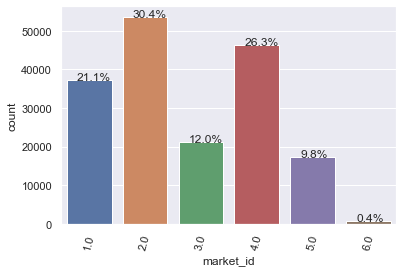

In [20]:
ax = sns.countplot(data=df,x="market_id")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
without_hue(ax,df.market_id)

## 2. order_protocol :

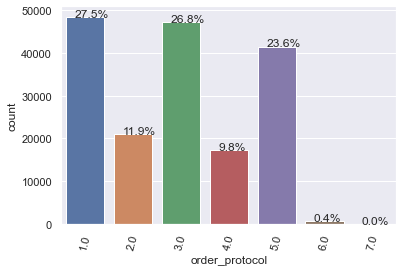

In [21]:
ax = sns.countplot(data=df,x="order_protocol")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
without_hue(ax,df.order_protocol)

## 3. store_primary_category :

* American store get 10 % of the total orders.
* Followed by Pizza.

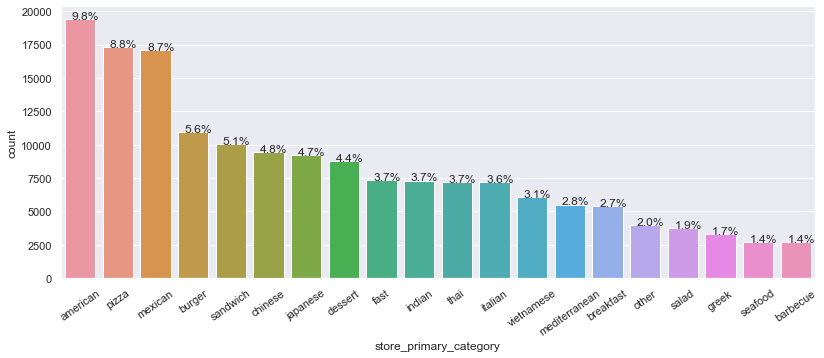

In [22]:
sns.set(rc={'figure.figsize':(13.5,5)})
ax = sns.countplot(data=dtest,x="store_primary_category", order = dtest['store_primary_category'].value_counts().head(20).index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35)
without_hue(ax,dtest.store_primary_category)

## 4. num_distinct_items :


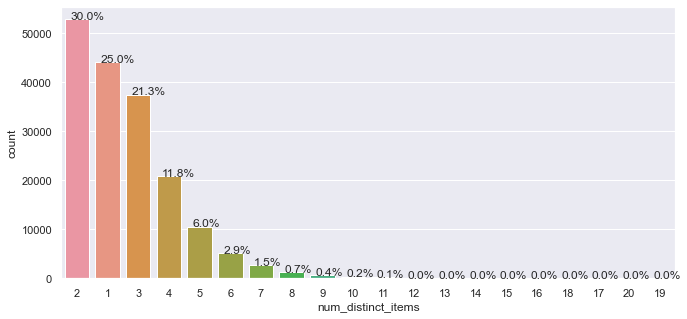

In [32]:
sns.set(rc={'figure.figsize':(11,5)})
ax = sns.countplot(data=df,x="num_distinct_items", order = df['num_distinct_items'].value_counts().head(20).index)
ax.set_xticklabels(ax.get_xticklabels())
without_hue(ax,df.num_distinct_items)

## 5.time_taken_mins

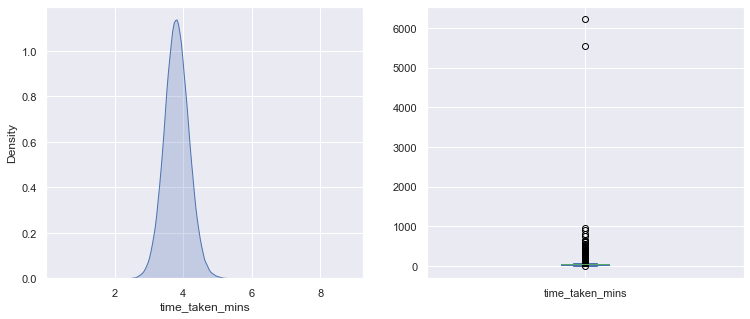

In [31]:
plt.subplot(121)
sns.kdeplot(np.log(df.time_taken_mins),shade=True)
plt.subplot(122)
df.time_taken_mins.plot.box(figsize=(12.5,5))
plt.show()

## 6. total_onshift_partners :  

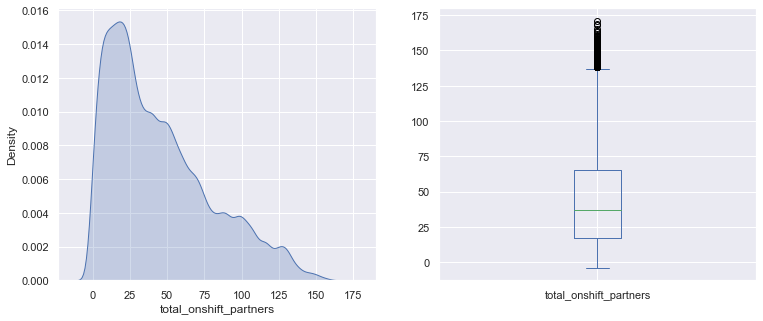

In [34]:
plt.subplot(121)
sns.kdeplot(df.total_onshift_partners, shade=True)
plt.subplot(122)
df.total_onshift_partners.plot.box(figsize=(12.5,5))
plt.show()

## 7. total_busy_partners :

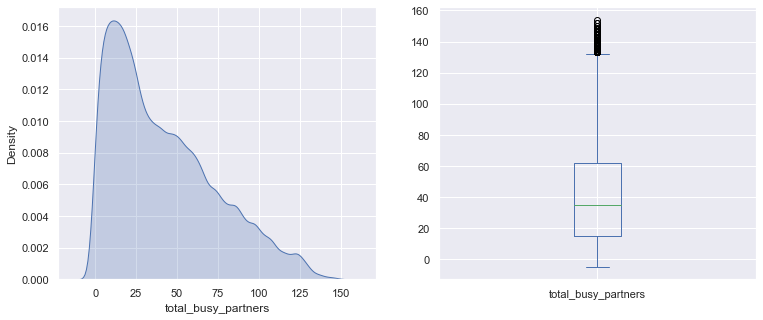

In [35]:
plt.subplot(121)
sns.kdeplot(df.total_busy_partners, shade=True)
plt.subplot(122)
df.total_busy_partners.plot.box(figsize=(12.5,5))
plt.show()

## 8. day :

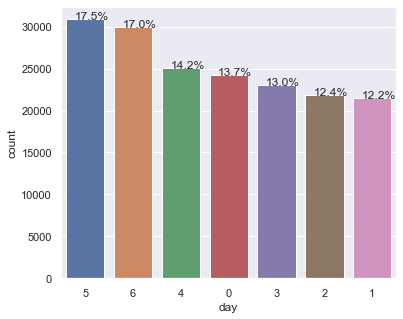

In [43]:
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(data=df,x="day", order = df['day'].value_counts().head(20).index)
ax.set_xticklabels(ax.get_xticklabels())
without_hue(ax,df.day)

## Heat Map: 
* sub total and total items are co-related.
* sub total and total items are inversely co-related.

<AxesSubplot:>

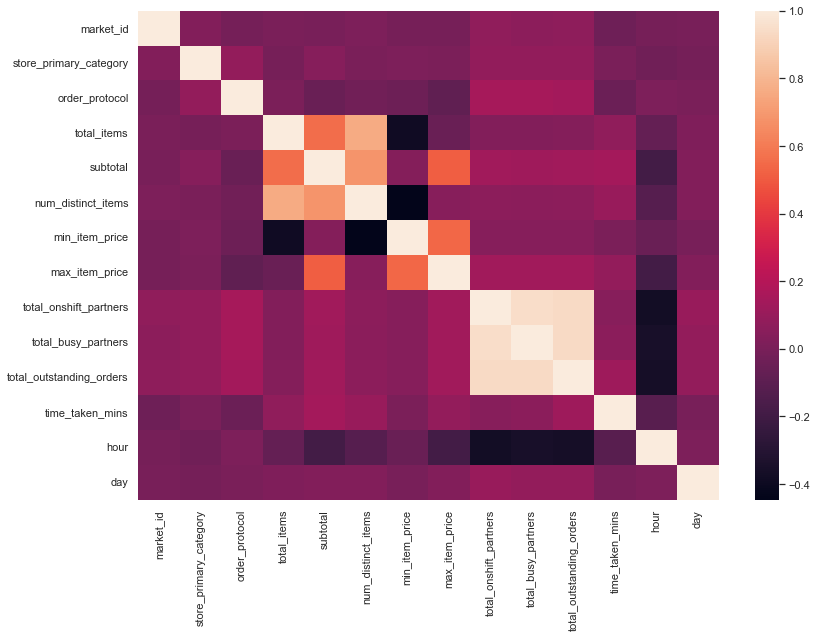

In [45]:
sns.set(rc={'figure.figsize':(13,9)})
sns.heatmap(df.corr())

<AxesSubplot:xlabel='time_taken_mins', ylabel='subtotal'>

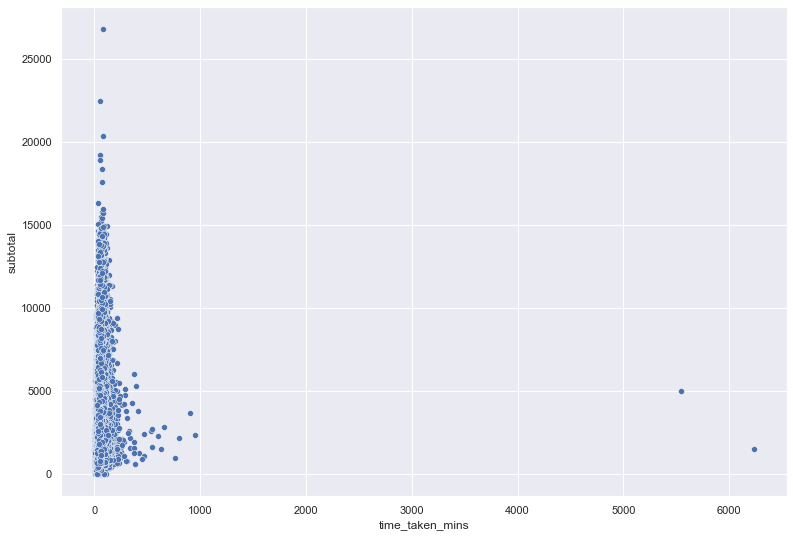

In [46]:
# 2. Check for outliers
sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)

## Outlier Detection: 

In [47]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model = LocalOutlierFactor()

df['lof_anomaly_score'] = model.fit_predict(df[['subtotal', 'time_taken_mins']])

In [48]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,day,lof_anomaly_score
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4,1
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1,1
8,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0,1
14,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3,1
15,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667,0,1,1
197424,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333,0,4,1
197425,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333,4,5,1
197426,1.0,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667,18,6,1


number of outliers :  (5561, 5561)


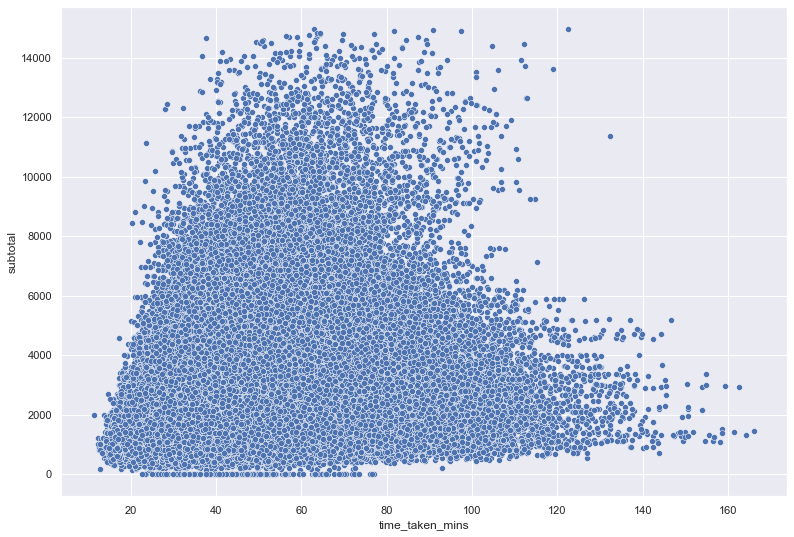

In [49]:
print("number of outliers : ",(len(df[df['lof_anomaly_score'] == -1]), (df['lof_anomaly_score'] == -1).sum()))
df_1 = df[df['lof_anomaly_score'] == 1]

sns.scatterplot(x='time_taken_mins', y='subtotal', data=df_1)

# drop anomaly column
df.drop(['lof_anomaly_score'],axis=1,inplace=True)

number of outliers :  (1936, 1936)


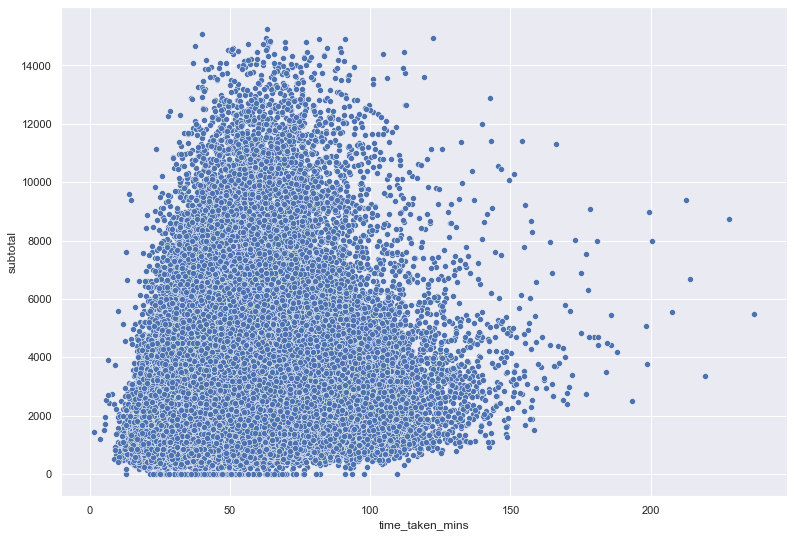

In [50]:
# Repeat globally
df['lof_anomaly_score'] = model.fit_predict(df)
print("number of outliers : ",(len(df[df['lof_anomaly_score'] == -1]), (df['lof_anomaly_score'] == -1).sum()))
df = df[df['lof_anomaly_score'] == 1]

sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)

# drop anomaly column
df.drop(['lof_anomaly_score'],axis=1,inplace=True)

<AxesSubplot:xlabel='hour', ylabel='time_taken_mins'>

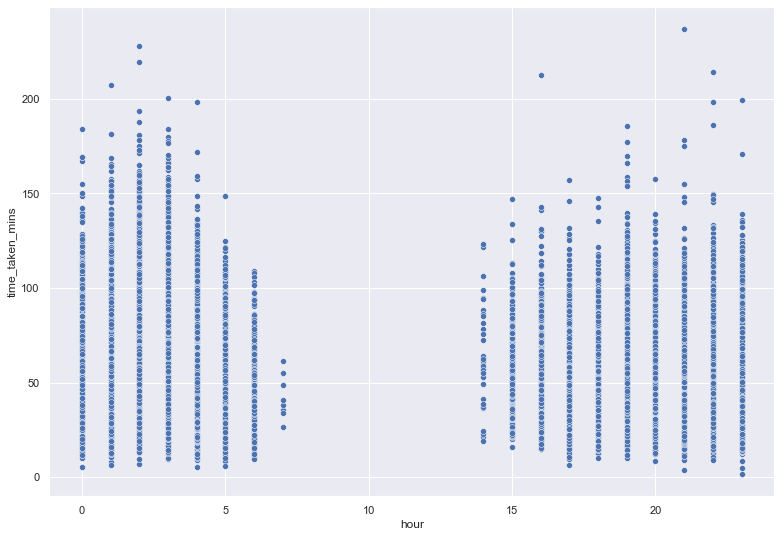

In [51]:
sns.scatterplot(data=df, x="hour", y="time_taken_mins")

## Task 4: Training Random Forest (Modelling - part 1)

0. Zooming out
1. Data Split
2. Model Random Forest
3. Evaluation metrics and its interpretation
4. Feature importance

In [52]:
from sklearn.model_selection import train_test_split
# Data_split

y=df['time_taken_mins']
x = df.drop(['time_taken_mins'], axis=1)
df.drop(['time_taken_mins'], axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=42)

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Model Random Forest
regressor = RandomForestRegressor()
 
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Prediction
prediction = regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print("mse : ", mse)
print("rmse : ",rmse)

mae = mean_absolute_error(y_test, prediction)
print('mae:' ,mae)

r2_score = r2_score(y_test, prediction)
print('r_squared:' ,r2_score)

mse :  227.1021129018961
rmse :  15.069907527980924
mae: 11.238497207098776
r_squared: 0.2784777371286016


In [57]:
import numpy as np
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [58]:
print("mape : ",MAPE(y_test, prediction))

mape :  26.144521098442624


Text(0.5, 0, 'Random Forest Feature Importance')

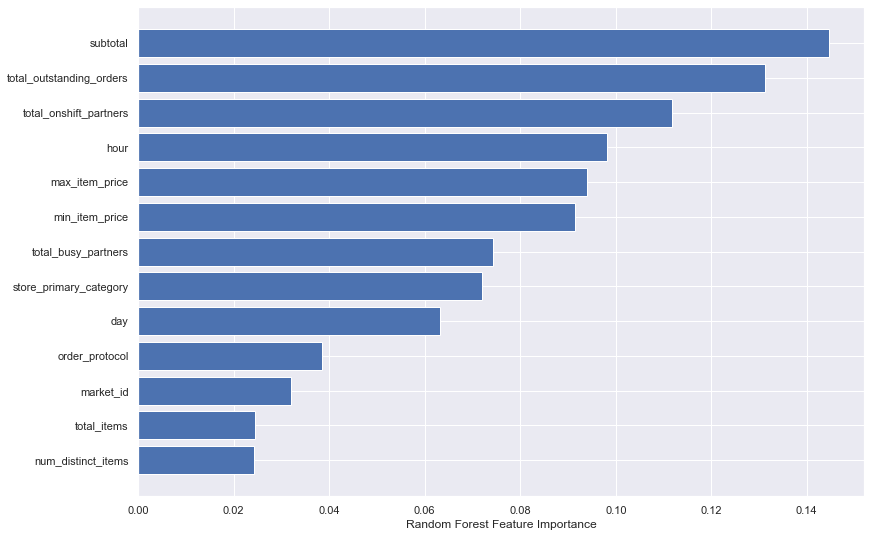

In [59]:
# Feature importance

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Task 5. Training Neural Networks (Modelling - part 2)

1. scaling of features
2. define model
3. model.fit
4. plots
5. model.predict
5. evaluate

In [60]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,  random_state=42)

In [61]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(14,  kernel_initializer='normal', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

ModuleNotFoundError: No module named 'tensorflow'